In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

WO7 - STEVE REYNARD PRASETYO - 0706022310027

# Exploratory Data Analysis

In [95]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [98]:
# rename the Income($)	column
df = df.rename(columns={"Income($)": "Income"})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


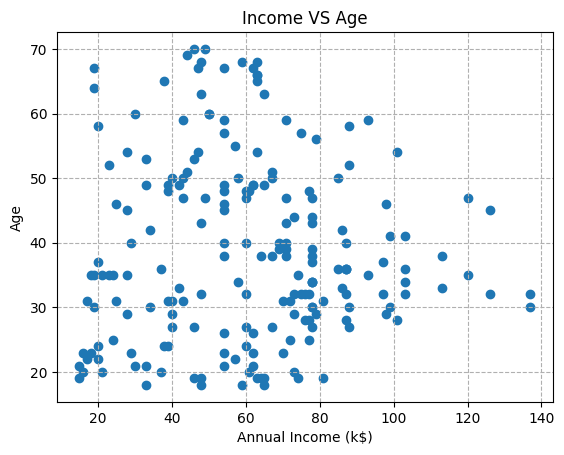

In [99]:
plt.scatter(df['Annual Income (k$)'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

/tmp/ipython-input-1774267031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


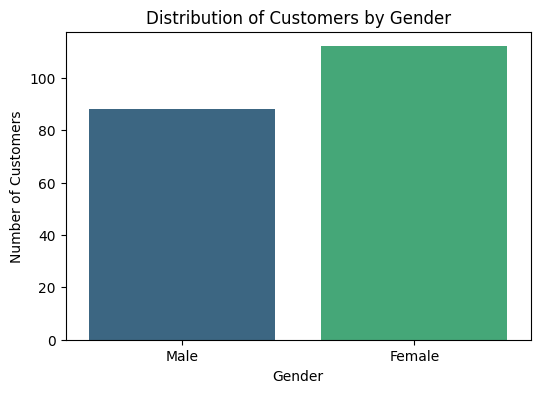

In [100]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

The bar plot illustrates the distribution of customers based on their gender, revealing that there are slightly more female customers (around 113) than male customers (around 87) in the dataset. This slight imbalance suggests that female customers form a marginally larger portion of the customer base. Such a difference may be relevant for developing targeted marketing strategies or conducting further analyses that consider gender-based preferences or behaviors.

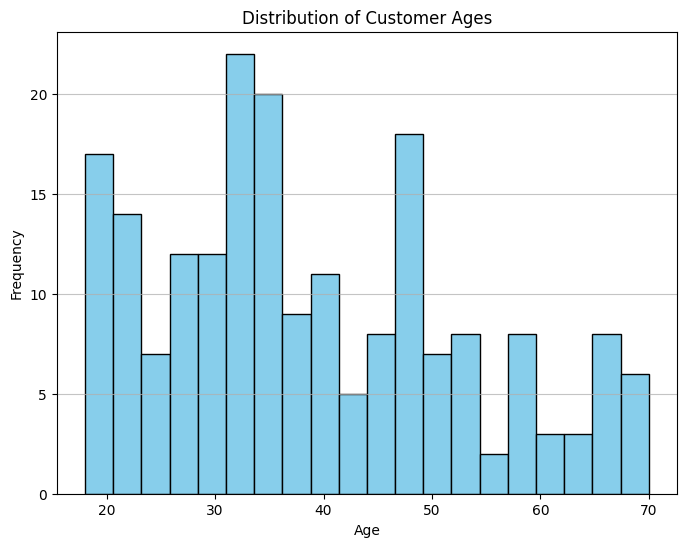

In [101]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram illustrates the distribution of customer ages, showing that ages range from 18 to 70. Most customers fall within the late 20s to late 40s age group, with a noticeable peak around the 30–40 age range. This indicates that while the mall attracts a diverse age range, there is a strong concentration of middle-aged customers, suggesting that this demographic could be a key target group for tailored marketing campaigns and promotional strategies.










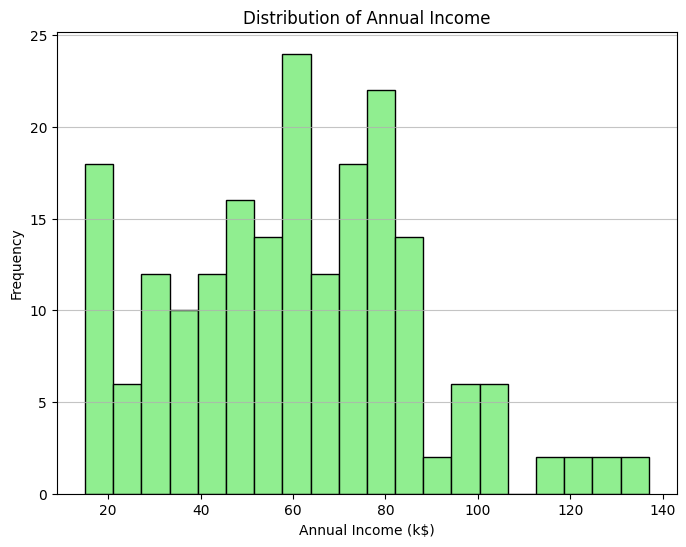

In [102]:
plt.figure(figsize=(8, 6))
plt.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

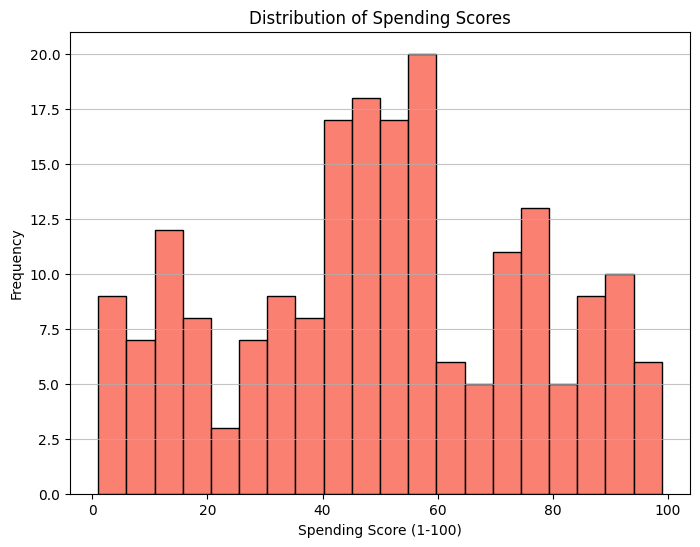

In [103]:
plt.figure(figsize=(8, 6))
plt.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Spending Scores')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

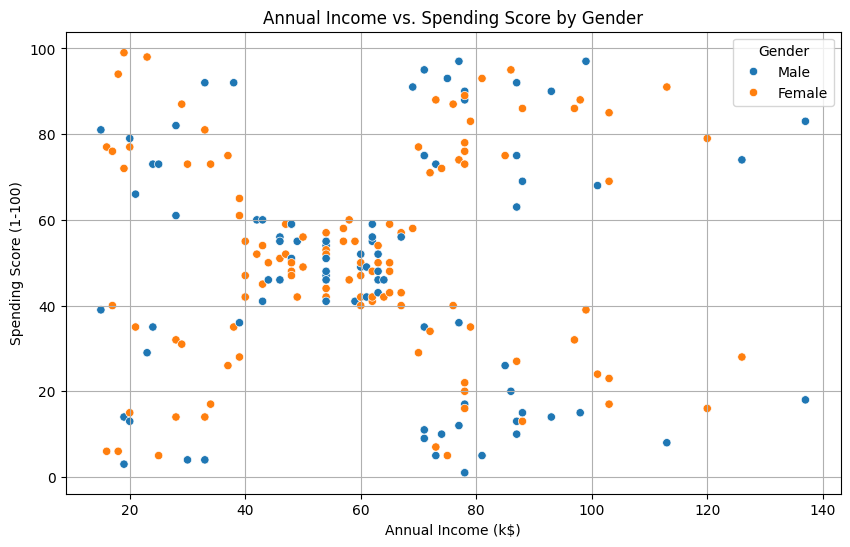

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

The histogram presents the distribution of customer spending scores, which range from 1 to 100. The scores are spread across the entire scale, indicating a diverse range of spending behaviors among customers. The distribution appears relatively uniform, with slight peaks between the 40–60 range and another smaller peak between 80–100. This pattern suggests that the mall caters to both moderate and high spenders, highlighting the presence of distinct customer segments. Understanding these variations in spending habits is essential for designing effective marketing strategies and personalized customer engagement approaches.

In [105]:
# Change gender column into cumeric values
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

#Display to verify the result
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       2   20                  16                       6
3           4       2   23                  16                      77
4           5       2   31                  17                      40


In [106]:
# create new dataframe that consist only annual income and spending score
df_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_clustering.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Data Scaling

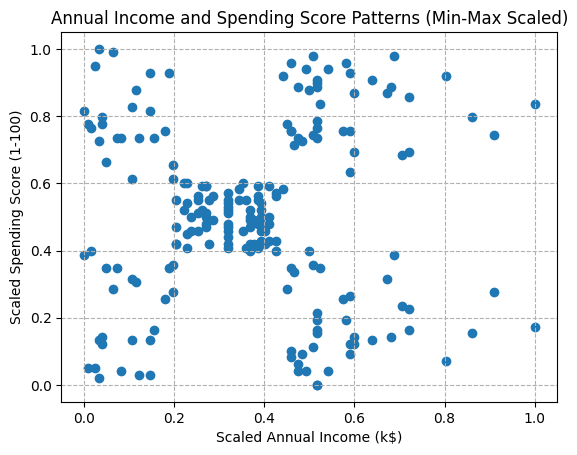

In [107]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=["Annual Income (k$)", "Spending Score (1-100)"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Annual Income (k$)"], df_minmax_scaled["Spending Score (1-100)"])
plt.xlabel("Scaled Annual Income (k$)")
plt.ylabel("Scaled Spending Score (1-100)")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns (Min-Max Scaled)")
plt.show()

# K-Means Clustering

In [108]:
from sklearn.cluster import KMeans

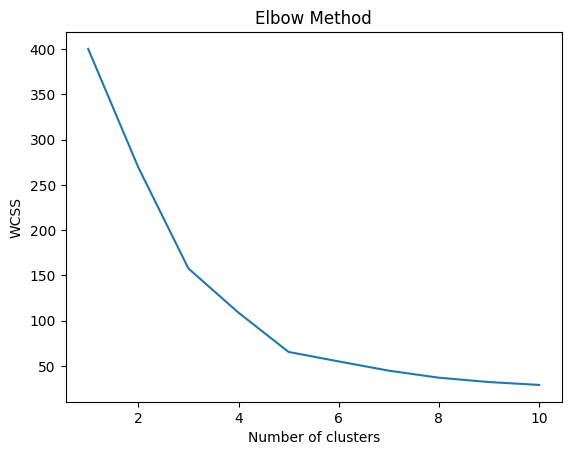

The 


In [109]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print ("The ")

In [110]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  400.000000
1                   2  269.299343
2                   3  157.704008
3                   4  108.921317
4                   5   65.568408
5                   6   55.114226
6                   7   44.911186
7                   8   37.148117
8                   9   32.345838
9                  10   29.178990


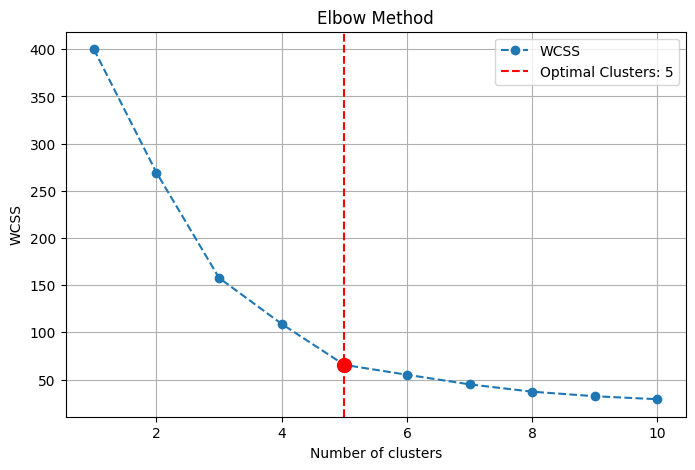

The optimal number of clusters is: 5


In [111]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [112]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,2,20,16,6,3
3,4,2,23,16,77,4
4,5,2,31,17,40,3


/tmp/ipython-input-958257746.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


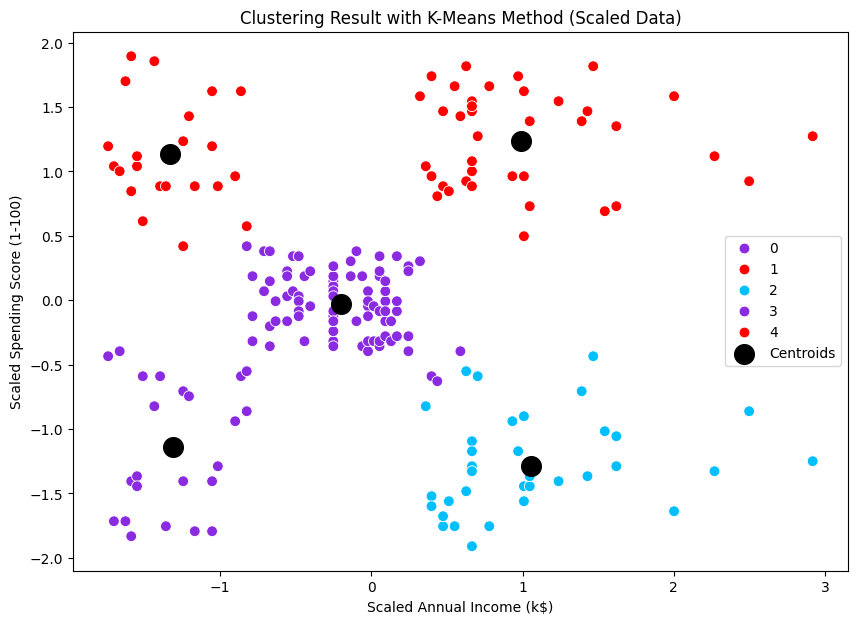

In [113]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Annual Income (k$)")
plt.ylabel("Scaled Spending Score (1-100)")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

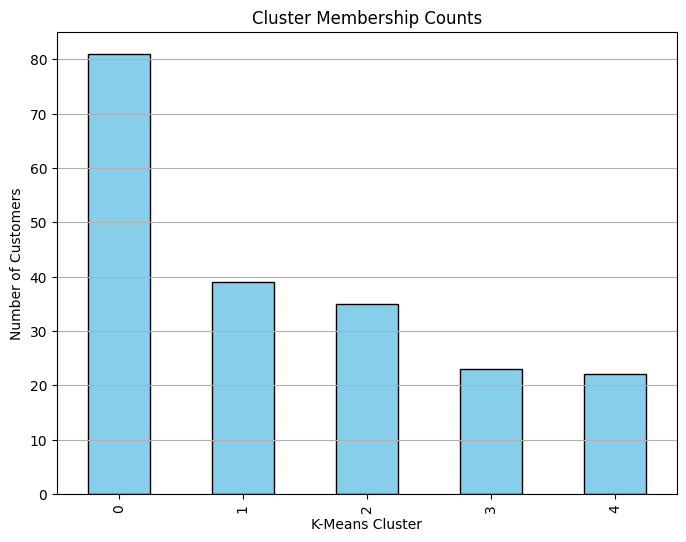

In [114]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [115]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Annual Income (k$)': ['mean', 'min', 'max'],
                                              'Spending Score (1-100)': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age         Annual Income (k$)           \
                     mean min max               mean min  max   
KMeans_cluster                                                  
0               42.716049  18  70          55.296296  39   76   
1               32.692308  27  40          86.538462  69  137   
2               41.114286  19  59          88.200000  70  137   
3               45.217391  19  67          26.304348  15   39   
4               25.272727  18  35          25.727273  15   39   

               Spending Score (1-100)          
                                 mean min max  
KMeans_cluster                                 
0                           49.518519  34  61  
1                           82.128205  63  97  
2                           17.114286   1  39  
3                           20.913043   3  40  
4                           79.363636  61  99

## Managerial Implications Based on the Five Clusters

Based on the K-Means clustering results, we can identify five distinct customer segments with different characteristics and implications for marketing strategies:

**Cluster 0: Mid-Income, Average Spenders**

*   **Profile:** This is the largest cluster, with a mean age of around 43 years. Their annual income and spending scores are around the average for the dataset (~$55k income, ~50 spending score).
*   **Implications:** This group represents a significant portion of the customer base. Marketing strategies should focus on broad appeal and value for money. General promotions and loyalty programs could be effective for retaining this segment.

**Cluster 1: High-Income, High Spenders**

*   **Profile:** This cluster consists of younger adults with the highest average annual income (~$86k) and high spending scores (~82). Their age is concentrated in the late 20s to early 40s.
*   **Implications:** This group is highly valuable due to their high spending. Target them with premium products, exclusive offers, and personalized experiences. Digital marketing channels and social media could be effective for reaching this tech-savvy group.

**Cluster 2: High-Income, Low Spenders**

*   **Profile:** This cluster has a high average annual income (~$88k) but low spending scores (~17). Their age is similar to Cluster 0, around 41 years.
*   **Implications:** This group has the purchasing power but is not currently spending much at the mall. Strategies should focus on understanding their needs and motivations. Targeted campaigns highlighting new arrivals, exclusive events, or personalized recommendations might encourage them to increase their spending. Building trust and showcasing value are key.

**Cluster 3: Low-Income, Low Spenders**

*   **Profile:** This cluster has low average annual income (~$26k) and low spending scores (~21). They are the oldest group on average, around 45 years old.
*   **Implications:** This group is likely price-sensitive. Focus on affordable products, discounts, and essential items. Value-based marketing and loyalty programs could be effective.

**Cluster 4: Low-Income, High Spenders**

*   **Profile:** This cluster has low average annual income (~$25k) but high spending scores (~79). They are the youngest group on average, around 25 years old.
*   **Implications:** This group is enthusiastic about spending despite having lower incomes. They might be influenced by trends and social factors. Marketing should focus on engaging content, social media promotions, and showcasing trending items. Offering flexible payment options or smaller, frequent purchases might be appealing.

Understanding these distinct customer segments allows for the development of tailored marketing strategies and a more personalized customer experience, potentially leading to increased engagement and revenue.